# Week1

## Ex1: Download submissions

### 1.

In [1]:
from psaw import PushshiftAPI
import datetime as dt
import pandas as pd


In [7]:
subreddit = 'wallstreetbets'
start_date = int(dt.datetime(2020,1,1).timestamp())
end_date = int(dt.datetime(2021,1,25).timestamp())
filters = ['title','id','score','created_utc','author','num_comments']

In [8]:
api = PushshiftAPI()
submissions = list(api.search_submissions(
                            after=start_date,
                            before=end_date,
                            subreddit=subreddit,
                            q='Gamestop'and'GME',
                            filter=filters,
                           ))

/Users/seunghwanlim/opt/anaconda3/lib/python3.7/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
/Users/seunghwanlim/opt/anaconda3/lib/python3.7/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/Users/seunghwanlim/opt/anaconda3/lib/python3.7/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


In [9]:
submissions[0]

submission(author='mricecream429', created_utc=1611529173, id='l49xif', num_comments=1, score=1, title='I am finally buying GME &amp; BB tomorrow.', created=1611525573.0, d_={'author': 'mricecream429', 'created_utc': 1611529173, 'id': 'l49xif', 'num_comments': 1, 'score': 1, 'title': 'I am finally buying GME &amp; BB tomorrow.', 'created': 1611525573.0})

### 2.

In [10]:
df_s = pd.DataFrame(data=submissions).drop(columns=['created','d_'])
df_s

,author,created_utc,id,num_comments,score,title
0,mricecream429,1611529173,l49xif,1,1,I am finally buying GME &amp; BB tomorrow.
1,SethEllis,1611529149,l49x88,0,1,Something that will help you autists in GME.
2,krasaa,1611528981,l49ve6,1,1,New member here. WHERE THE FUCK DO I BUY SOME ...
3,Biverrarton,1611528976,l49vc5,0,1,Realistically is it too late to get in on GME ...
4,maskedmurader,1611528890,l49ubq,0,1,My retard meal before $GME goes TO THE MOON! 🚀...
...,...,...,...,...,...,...
13906,WSBConsensus,1579014000,eomcha,9,1,"Woke up late, need this coffee"
13907,Rang_Dipkin,1578949932,eoafl3,1,1,Die $GME die
13908,callmetmrw,1578594078,emdmfg,7,1,Gamestop and Ford. This is the way
13909,-deepwatervalue,1578284023,ekomox,0,1,GME. You know what to do


In [11]:
df_s.to_csv('../ComSocSci/GME_submissions.csv', index=False)

### 3.

In [12]:
data_s = pd.read_csv('../ComSocSci/GME_submissions.csv')

In [34]:
#Drop the column on timestamp format
data_s['datetime'] = data_s['created_utc'].map(lambda t: dt.datetime.utcfromtimestamp(t))
#data_s = df_p.drop('created_utc', axis=1) 

#Sort the Row by datetime               
data_s = data_s.sort_values(by='datetime')  

#Convert timestamp format to datetime for data analysis               
#data_s["datetime"] = pd.to_datetime(data_s["datetime"])

In [35]:
data_s

,author,created_utc,id,num_comments,score,title,datetime
13910,DeepFuckingValue,1577844808,eick65,52,1,GME YOLO month-end update — Dec 2019,2020-01-01 02:13:28
13909,-deepwatervalue,1578284023,ekomox,0,1,GME. You know what to do,2020-01-06 04:13:43
13908,callmetmrw,1578594078,emdmfg,7,1,Gamestop and Ford. This is the way,2020-01-09 18:21:18
13907,Rang_Dipkin,1578949932,eoafl3,1,1,Die $GME die,2020-01-13 21:12:12
13906,WSBConsensus,1579014000,eomcha,9,1,"Woke up late, need this coffee",2020-01-14 15:00:00
...,...,...,...,...,...,...,...
4,maskedmurader,1611528890,l49ubq,0,1,My retard meal before $GME goes TO THE MOON! 🚀...,2021-01-24 22:54:50
3,Biverrarton,1611528976,l49vc5,0,1,Realistically is it too late to get in on GME ...,2021-01-24 22:56:16
2,krasaa,1611528981,l49ve6,1,1,New member here. WHERE THE FUCK DO I BUY SOME ...,2021-01-24 22:56:21
1,SethEllis,1611529149,l49x88,0,1,Something that will help you autists in GME.,2021-01-24 22:59:09


In [29]:
resampled = data_s.groupby([data_s.datetime.dt.date]).count()

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

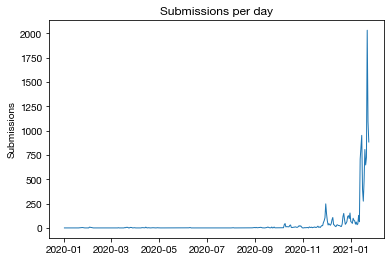

In [33]:
plt.plot(resampled.index,resampled.id, label='Submissions')
plt.ylabel('Submissions')
plt.title('Submissions per day')
plt.show()

## ex2

In [2]:
subreddit = 'wallstreetbets'
start_date = int(dt.datetime(2020,1,1).timestamp())
end_date = int(dt.datetime(2021,1,25).timestamp())
filters = ['id','link_id','score','created_utc','author','parent_id']

In [3]:
api = PushshiftAPI()
comments = list(api.search_comments(
                        after=start_date,
                        before=end_date,
                        subreddit=subreddit,
                        q='Gamestop'and'GME',
                        filter=filters,
                        ))

/Users/seunghwanlim/opt/anaconda3/lib/python3.7/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
/Users/seunghwanlim/opt/anaconda3/lib/python3.7/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/Users/seunghwanlim/opt/anaconda3/lib/python3.7/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


In [4]:
comments

[comment(author='skinfather11216', created_utc=1611489991, id='gkjkq9i', link_id='t3_l3y4mp', parent_id='t3_l3y4mp', score=82, created=1611486391.0, d_={'author': 'skinfather11216', 'created_utc': 1611489991, 'id': 'gkjkq9i', 'link_id': 't3_l3y4mp', 'parent_id': 't3_l3y4mp', 'score': 82, 'created': 1611486391.0}),
 comment(author='RDOOLS-55', created_utc=1611489889, id='gkjkbzg', link_id='t3_l3we79', parent_id='t3_l3we79', score=-7, created=1611486289.0, d_={'author': 'RDOOLS-55', 'created_utc': 1611489889, 'id': 'gkjkbzg', 'link_id': 't3_l3we79', 'parent_id': 't3_l3we79', 'score': -7, 'created': 1611486289.0}),
 comment(author='1984Summer', created_utc=1611489841, id='gkjk5ou', link_id='t3_l3wcf7', parent_id='t1_gkjjdcz', score=223, created=1611486241.0, d_={'author': '1984Summer', 'created_utc': 1611489841, 'id': 'gkjk5ou', 'link_id': 't3_l3wcf7', 'parent_id': 't1_gkjjdcz', 'score': 223, 'created': 1611486241.0}),
 comment(author='Bloody_sock_puppet', created_utc=1611489788, id='gkjj

In [5]:
df_c = pd.DataFrame(data=comments).drop(columns=['created','d_'])
df_c

,author,created_utc,id,link_id,parent_id,score
0,skinfather11216,1611489991,gkjkq9i,t3_l3y4mp,t3_l3y4mp,82
1,RDOOLS-55,1611489889,gkjkbzg,t3_l3we79,t3_l3we79,-7
2,1984Summer,1611489841,gkjk5ou,t3_l3wcf7,t1_gkjjdcz,223
3,Bloody_sock_puppet,1611489788,gkjjyyk,t3_l3mm9a,t1_gkgld3u,0
4,JRSmithwithabadshot,1611489759,gkjjv8x,t3_l2wx2p,t3_l2wx2p,10
...,...,...,...,...,...,...
182971,hsauers,1577908789,fcrz7v8,t3_eick65,t1_fcpnw54,1
182972,HawkJockey,1577889479,fcqoa4x,t3_eick65,t3_eick65,1
182973,veritasinvestments,1577856728,fcpb1po,t3_ei9pul,t1_fcp5ocf,1
182974,PleaseBuffTechies,1577854835,fcp99eb,t3_eick65,t1_fcp7fz5,1


In [6]:
df_c.to_csv('../ComSocSci/GME_comments.csv', index=False)